In [9]:
class SGD:
    def __init__(self, lr, batch_size, X, y, epochs):
        """
        initialize the SGD

        Parameters: 
        lr: learning rate
        batch size: size of each batch
        X: training data
        y: labels to be used
        epochs: number of epochs to train the model
        """
        self.lr = lr
        self.batch_size = batch_size
        self.X = X
        self.y = y
        self.epochs = epochs
        self.W = None
        self.b = None
        self.losses = []  # To store the loss at each epoch

    def forward_pass(self, X):
        """ 
        forward pass to train the model
        Parameters:
        X: input data
        Returns: Z-value  of the forward pass
        """
        return np.dot(self.W.T, X) + self.b

    def initialize(self, features):
        """
        Initialize weights and bias
        Parameters:
        features: number of features in the dataset
        Returns: None
        
        """
        np.random.seed(0)
        self.W = np.random.randn(features, 1)
        self.b = np.random.randn(1)

    @staticmethod
    def gradients(Z, y, X):
        """
        Calculate gradients for weights and bias
        Parameters:
        Z: predicted values
        y: actual labels
        X: input data

        Returns: gradients of weights and bias
        """
        dZ = Z - y
        m = y.shape[1]
        dW = np.dot(X, dZ.T) / m
        db = np.sum(dZ) / m
        return dW, db

    def updates(self, dW, db):
        """
        update weights and bias

        Parameters: 
        dw: gradients of weights
        db: gradients of bias

        Returns: None
        """
        self.W = self.W - self.lr * dW
        self.b = self.b - self.lr * db

    def compute_loss(self, Z, y):
        """
        Compute the loss for the model
        Parameters:
        Z: predicted values
        y: true labels

        Returns:

        loss: loss for the model
        """
        m = y.shape[1]
        loss = np.sum((Z - y) ** 2) / (2 * m)
        return loss

    def model(self):
        """
        function to train the model
        input: None
        returns : None
        """
        np.random.seed(0)
        features = self.X.shape[0]
        n_examples = self.X.shape[1]

        self.initialize(features)

        X_shuffled_indx = np.arange(0, n_examples)
        for e in range(self.epochs):
            np.random.shuffle(X_shuffled_indx)
            X_s = self.X[:, X_shuffled_indx]
            y_s = self.y[:, X_shuffled_indx]

            epoch_loss = 0
            for i in range(0, n_examples, self.batch_size):
                X_batch = X_s[:, i:i + self.batch_size]
                y_batch = y_s[:, i:i + self.batch_size]
                Z = self.forward_pass(X_batch)
                dW, db = SGD.gradients(Z, y_batch, X_batch)
                self.updates(dW, db)
                epoch_loss += self.compute_loss(Z, y_batch)
            
            self.losses.append(epoch_loss / (n_examples // self.batch_size))


In [10]:
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)


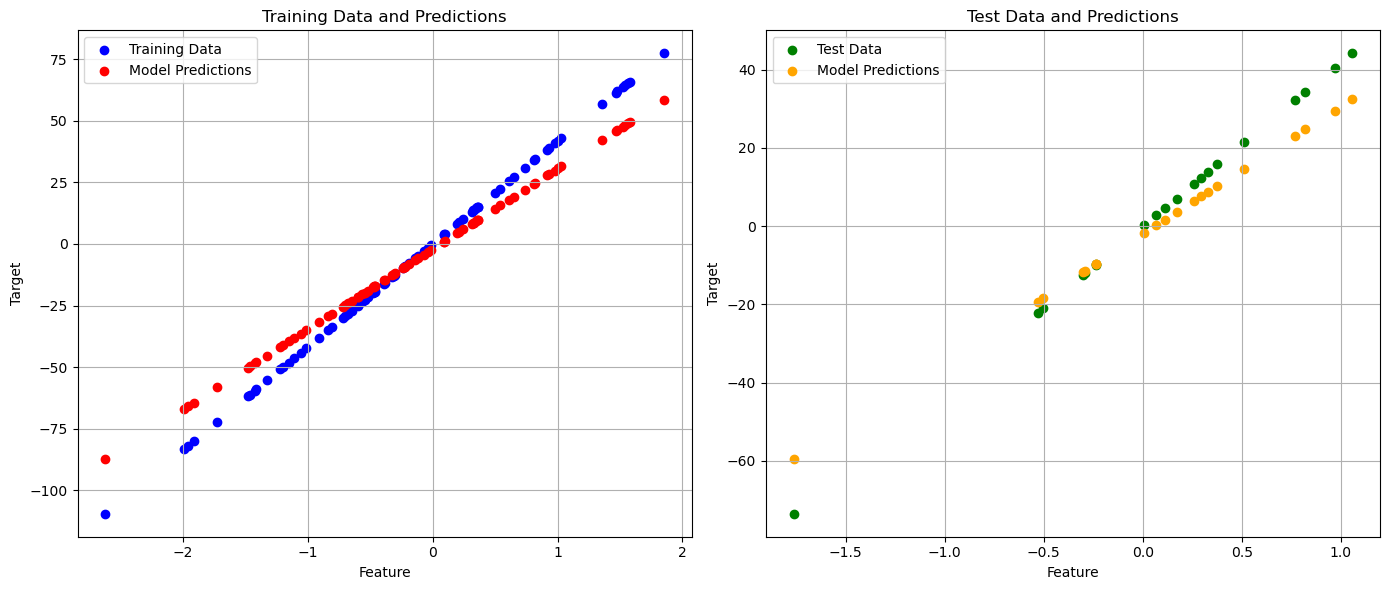

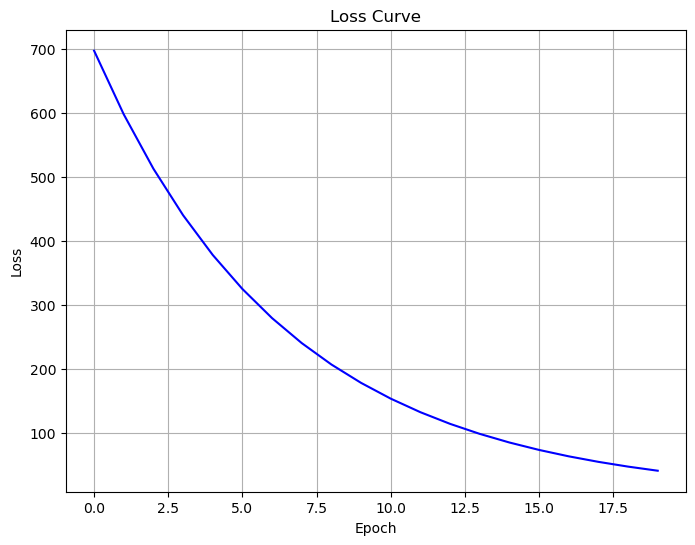

In [12]:
import matplotlib.pyplot as plt


sgd = SGD(lr=0.001, batch_size=1, X=X_train.T, y=y_train.reshape(-1, 1).T, epochs=20)
sgd.model()

y_train_pred = sgd.forward_pass(X_train.T)
y_test_pred = sgd.forward_pass(X_test.T)


plt.figure(figsize=(14, 6))

# Plot Training Data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_train, y_train_pred.flatten(), color='red', label='Model Predictions')
plt.title('Training Data and Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

# Plot Test Data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_test_pred.flatten(), color='orange', label='Model Predictions')
plt.title('Test Data and Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(sgd.losses, color='blue')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
